![](https://www.finplus.co.in/wp-content/uploads/2017/10/Top-Categories-In-Online-Retail-In-India.jpg)

## Contexto
<a href="https://drive.google.com/file/d/1T1YHmTUcnOgVfTLnQRtNrzLIgazr2N4S/view?usp=sharing">Online retail es un dataset transaccional</a> que contiene todas las transacciones que ocurrieron entre el 1/12/2010 y el 9/12/2011 en el e-commerce de UK. La compañía vende principalmente regalos y sus clientes tienden a ser revendedores que compran al por mayor.

## Documentación
https://archive.ics.uci.edu/dataset/352/online+retail

## Objetivo de Negocio
"Buscamos segmentar a nuestros clientes para entender sus características y patrones de compra para así poder ofrecerles una mejor experiencia."

**En base a los clusteres creados, expliquenos las características de cada tipo de cliente y qué productos podríamos ofrecerles.**



## Consigna
1. Hacer un breve análisis descriptivo del dataset
2. Al ser un dataset transaccional, hacer todas las modificaciones necesarias para poder utilizarlo (agrupaciones, agregar columnas, etc).
3. Probar los modelos que conocen para dividir en clusters, elegir el que mejor resultado les de.
4. En base a los clusteres creados, expliquen las características de cada tipo de cliente y qué productos se podría ofrecerles.

---

<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTACIÓN DE LIBRERÍAS</p>

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.colors import ListedColormap
from sklearn import metrics
import plotly.express as px
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">CARGA DE DATOS</p>

In [296]:
df_retail = pd.read_excel('/Users/lolonastri/Desktop/IA_UCEMA/trabajos_practicos/tp4_onlineretail/data/Online Retail.xlsx', sheet_name='Online Retail')
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">COMPRENSIÓN DE LOS DATOS</p>

### → Validación de la data

In [297]:
print("El dataset tiene" , df_retail.shape[0], "filas y", df_retail.shape[1], "columnas")

El dataset tiene 541909 filas y 8 columnas


In [298]:
df_retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [299]:
from funciones.funciones import validate_columns
validate_columns(df_retail)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
InvoiceNo,25900.0,541909.0,0,0.000000,"[555200, 554974, 550972, 576652, 546157]"
StockCode,4070,541909,0,0.000000,"[71459, 21128, 21086, 22812, 22180]"
Description,4223,540455,1454,0.268311,"[HANGING JAM JAR T-LIGHT HOLDER, GOLD FISHING ..."
Quantity,NaN,541909.0,0,0.000000,"[24, 4, 4, 3, 2]"
InvoiceDate,NaN,541909,0,0.000000,"[2011-06-01 12:05:00, 2011-05-27 17:14:00, 201..."
UnitPrice,NaN,541909.0,0,0.000000,"[0.85, 6.95, 0.65, 1.95, 9.95]"
CustomerID,NaN,406829.0,135080,24.926694,"[17315.0, 14031.0, 14031.0, 17198.0, 13502.0]"
Country,38,541909,0,0.000000,"[United Kingdom, United Kingdom, United Kingdo..."


In [300]:
df_retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### →  Veo los tipos de datos con dtypes

In [301]:
df_retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

### → Valores outliers

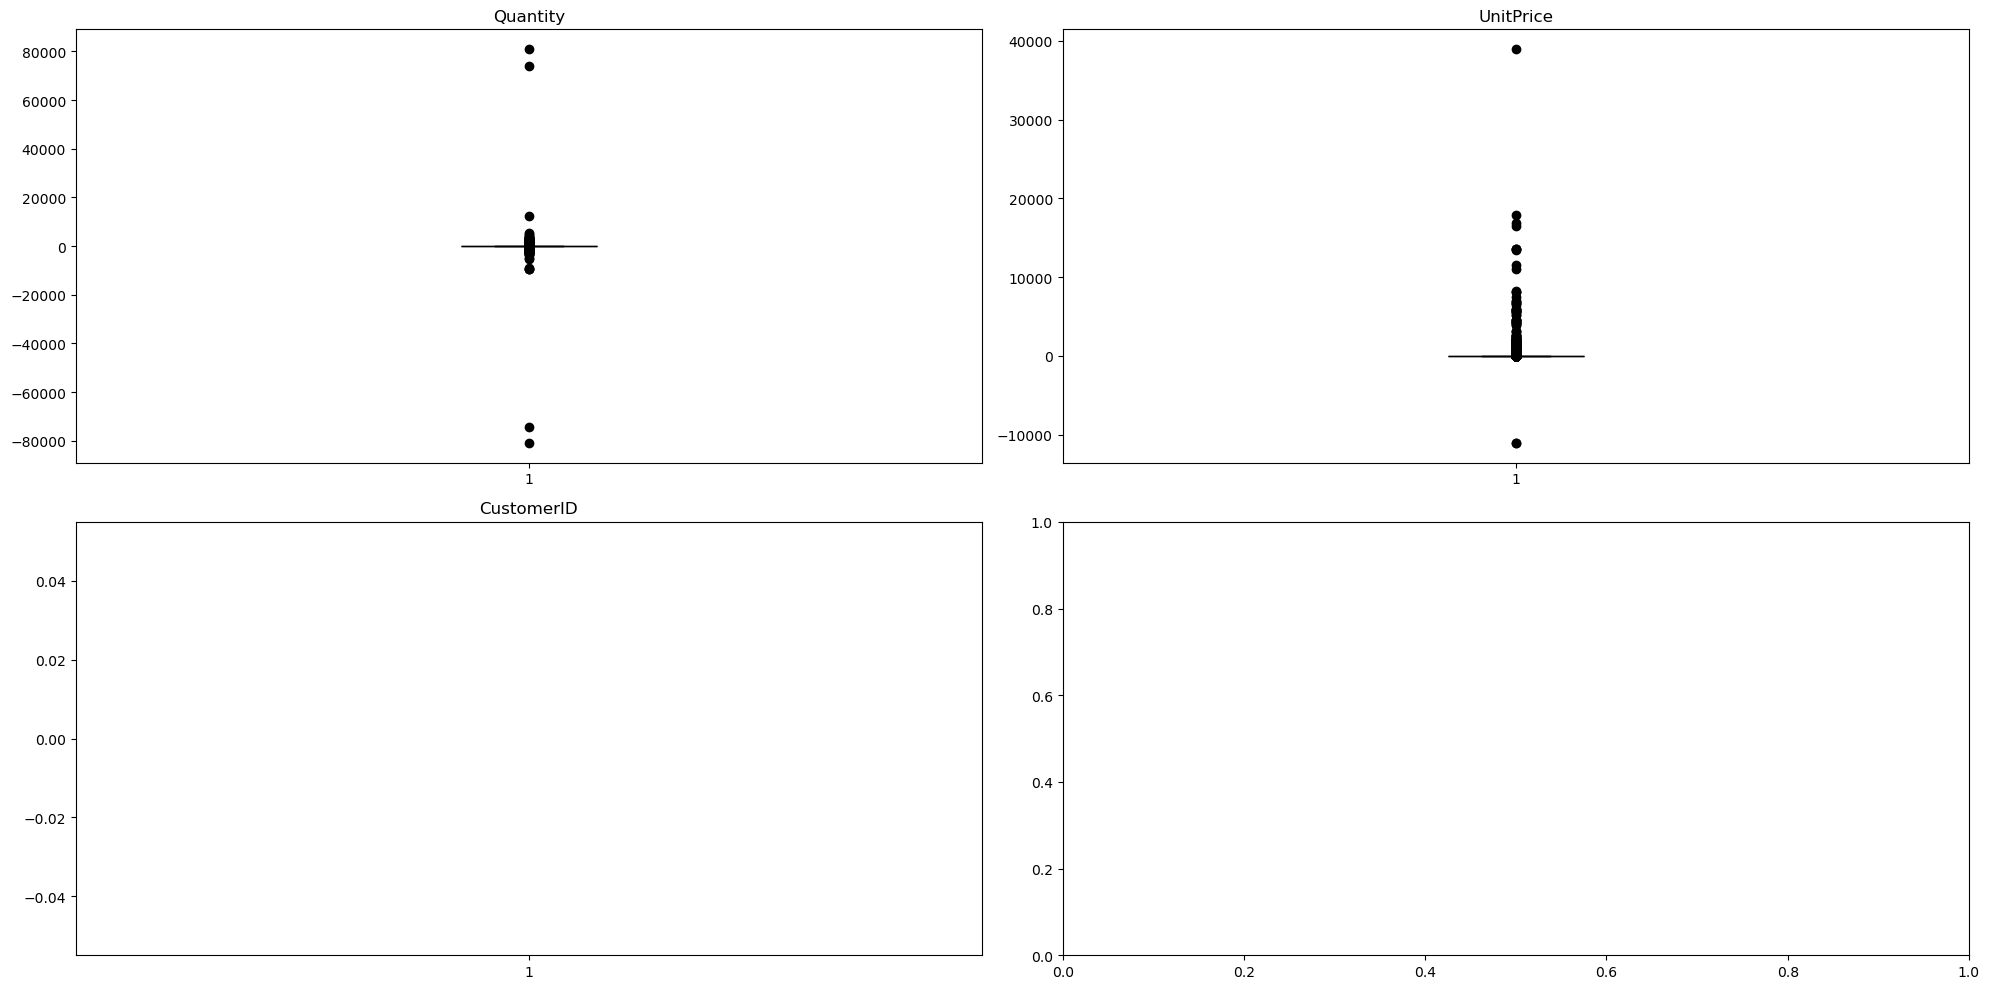

In [302]:
from funciones.funciones import plot_outliers
plot_outliers(df_retail)



### 📦 Quantity
- Se observan **valores extremadamente altos y bajos**.
- **Outliers positivos:** cantidades mayores a 80.000 unidades podrían ser errores o ventas mayoristas atípicas.
- **Outliers negativos:** cantidades negativas (ej. -80.000) probablemente representan **devoluciones**.

---

### 💵 UnitPrice
- Se detectan **valores negativos**, lo cual **no tiene sentido comercial** (precio < 0).
- También hay **precios excesivamente altos** (ej. > 30.000), posiblemente errores tipográficos.

Decido eliminar los outliers negativos, ya que no tienen sentido comercial. Para los outliers positivos, los mantengo, ya que podrían representar ventas mayoristas o productos de lujo.



<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">LIMPIEZA DE DATOS</p>

In [303]:
# Filtrar facturas que empiezan con "C"
df_devoluciones = df_retail[df_retail['InvoiceNo'].astype(str).str.startswith('C')]

print(f"Hay {df_devoluciones.shape[0]} registros de devoluciones.")
df_devoluciones[['InvoiceNo', 'CustomerID', 'Description', 'Quantity', 'UnitPrice']].head(10)

Hay 9288 registros de devoluciones.


,InvoiceNo,CustomerID,Description,Quantity,UnitPrice
141,C536379,14527.0,Discount,-1,27.50
154,C536383,15311.0,SET OF 3 COLOURED FLYING DUCKS,-1,4.65
235,C536391,17548.0,PLASTERS IN TIN CIRCUS PARADE,-12,1.65
236,C536391,17548.0,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29
237,C536391,17548.0,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29
238,C536391,17548.0,PACK OF 12 RED RETROSPOT TISSUES,-24,0.29
239,C536391,17548.0,CHICK GREY HOT WATER BOTTLE,-12,3.45
240,C536391,17548.0,PLASTERS IN TIN VINTAGE PAISLEY,-12,1.65
241,C536391,17548.0,PLASTERS IN TIN SKULLS,-24,1.65
939,C536506,17897.0,JAM MAKING SET WITH JARS,-6,4.25


💡 **¿Por qué eliminarlas?**

- Las facturas cuyo `InvoiceNo` comienza con la letra **"C"** representan **notas de crédito** o **devoluciones de productos** hechas por los clientes.
- Estas transacciones **restan stock** y en general **no reflejan un comportamiento de compra**.
- Pueden **distorsionar el cálculo** de gasto total, cantidad comprada y frecuencia de compra.
Como el objetivo es **entender el comportamiento de compra real**, se eliminan.


In [304]:
# Copia de seguridad del dataset original
df_clean = df_retail.copy()

# Elimino las filas con CustomerID nulo porque no puedo hacer nada con ellas
df_clean = df_clean.dropna(subset=['CustomerID'])

# Filtro las cantidades y precios mayores a cero porque no tienen sentido
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

# Elimino las devoluciones (InvoiceNo que empieza con 'C')
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]

df_clean.reset_index(drop=True, inplace=True)

print("Después de la limpieza, el dataset tiene", df_clean.shape[0], "filas y", df_clean.shape[1], "columnas.")
df_clean.head()

Después de la limpieza, el dataset tiene 397884 filas y 8 columnas.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">GENERACIÓN DE NUEVAS CARACTERÍSTICAS</p>

In [305]:
# 1. Creo la columna de monto gastado
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

# 2. Agregación principal por CustomerID
df_clientes = df_clean.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',       # Número de compras distintas
    'Quantity': 'sum',            # Cantidad total de productos comprados
    'TotalAmount': 'sum',         # Gasto total
    'Country': 'first'            # País 
}).rename(columns={
    'InvoiceNo': 'n_compras',
    'Quantity': 'cantidad_total',
    'TotalAmount': 'gasto_total',
    'Country': 'pais'
}).reset_index()

# 3. Obtengo el producto más comprado por cliente
top_product = df_clean.groupby(['CustomerID', 'Description'])['Quantity'].sum().reset_index()
idx = top_product.groupby('CustomerID')['Quantity'].idxmax()
productos_top = top_product.loc[idx][['CustomerID', 'Description']].set_index('CustomerID')

# 4. Mergeo el producto más comprado al DataFrame principal
df_clientes = df_clientes.set_index('CustomerID')
df_clientes['producto_top'] = productos_top['Description']
df_clientes = df_clientes.reset_index()

# 5. Tomo como fecha de referencia la fecha máxima de compra
fecha_max = df_clean['InvoiceDate'].max()

# 6. Recencia (días desde la última compra)
ultima_compra = df_clean.groupby('CustomerID')['InvoiceDate'].max()
recencia_dias = (fecha_max - ultima_compra).dt.days

# 7. Número de productos distintos
n_productos_distintos = df_clean.groupby('CustomerID')['Description'].nunique()

# 8. Ticket promedio
ticket_promedio = df_clientes['gasto_total'] / df_clientes['n_compras']

# 9. Frecuencia mensual
dias_totales = (df_clean['InvoiceDate'].max() - df_clean['InvoiceDate'].min()).days
frecuencia_mensual = df_clientes['n_compras'] / (dias_totales / 30)

# 10. Intensidad de compra (productos por compra)
intensidad_compra = df_clientes['cantidad_total'] / df_clientes['n_compras']

In [306]:
# --- Asigno al DataFrame usando .map() donde corresponda ---
df_clientes['recencia_dias'] = df_clientes['CustomerID'].map(recencia_dias)
df_clientes['n_productos_distintos'] = df_clientes['CustomerID'].map(n_productos_distintos)
df_clientes['ticket_promedio'] = ticket_promedio
df_clientes['frecuencia_mensual'] = frecuencia_mensual
df_clientes['intensidad_compra'] = intensidad_compra

In [307]:
df_clientes.head()

,CustomerID,n_compras,cantidad_total,gasto_total,pais,producto_top,recencia_dias,n_productos_distintos,ticket_promedio,frecuencia_mensual,intensidad_compra
0,12346.0,1,74215,77183.60,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR,325,1,77183.600000,0.080429,74215.000000
1,12347.0,7,2458,4310.00,Iceland,ICE CREAM SUNDAE LIP GLOSS,1,103,615.714286,0.563003,351.142857
2,12348.0,4,2341,1797.24,Finland,DOUGHNUT LIP GLOSS,74,22,449.310000,0.321716,585.250000
3,12349.0,1,631,1757.55,Italy,STRAWBERRY CERAMIC TRINKET POT,18,73,1757.550000,0.080429,631.000000
4,12350.0,1,197,334.40,Norway,TEA BAG PLATE RED RETROSPOT,309,17,334.400000,0.080429,197.000000


---

### →  Agrupaciones

1. Clasificación de gasto: bajo, medio, alto

In [308]:
# Se usan cuantiles para segmentar los datos. Uso q=3 porque quiero segmentar en 3 grupos. 
df_clientes['segmento_gasto'] = pd.qcut(df_clientes['gasto_total'], q=3, labels=['Bajo', 'Medio', 'Alto'])

2. Asignación de continente

In [309]:
# Diccionario de país a continente
pais_a_continente = {
    'United Kingdom': 'Europa',
    'France': 'Europa',
    'Germany': 'Europa',
    'Spain': 'Europa',
    'Portugal': 'Europa',
    'Italy': 'Europa',
    'Belgium': 'Europa',
    'Netherlands': 'Europa',
    'Norway': 'Europa',
    'Sweden': 'Europa',
    'Switzerland': 'Europa',
    'Finland': 'Europa',
    'Austria': 'Europa',
    'Denmark': 'Europa',
    'Cyprus': 'Europa',
    'Australia': 'Oceanía',
    'Japan': 'Asia',
    'Singapore': 'Asia',
    'Hong Kong': 'Asia',
    'Israel': 'Asia',
    'Iceland': 'Europa',
    'Brazil': 'América',
    'Canada': 'América',
    'USA': 'América',
    'Bahrain': 'Oriente Medio',
    'Saudi Arabia': 'Oriente Medio',
    'United Arab Emirates': 'Oriente Medio'
}

df_clientes['continente'] = df_clientes['pais'].map(pais_a_continente).fillna('Otro')


 3. Segmentación de recencia

In [310]:
# Se usan cuantiles para segmentar los datos nuevamente, pero en base a la recencia (días desde la última compra). Uso q=3 porque quiero segmentar en 3 grupos.
df_clientes['segmento_recencia'] = pd.qcut(df_clientes['recencia_dias'], q=3, labels=['Reciente', 'Intermedio', 'Inactivo'])

4. Clasificación por tipo de cliente

In [311]:
# Creo la columna de segmento_gasto creando 3 grupos de acuerdo a distintas condiciones:
# Premium: Alto gasto y frecuencia mensual mayor a la mediana
# Estándar: Medio gasto
# Ocasional: Bajo gasto o frecuencia mensual menor a la mediana

def clasificar_tipo(row):
    if row['segmento_gasto'] == 'Alto' and row['frecuencia_mensual'] > df_clientes['frecuencia_mensual'].median():
        return 'Premium'
    elif row['segmento_gasto'] == 'Medio':
        return 'Estándar'
    else:
        return 'Ocasional'

df_clientes['tipo_cliente'] = df_clientes.apply(clasificar_tipo, axis=1)

In [312]:
df_clientes.head()

,CustomerID,n_compras,cantidad_total,gasto_total,pais,producto_top,recencia_dias,n_productos_distintos,ticket_promedio,frecuencia_mensual,intensidad_compra,segmento_gasto,continente,segmento_recencia,tipo_cliente
0,12346.0,1,74215,77183.60,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR,325,1,77183.600000,0.080429,74215.000000,Alto,Europa,Inactivo,Ocasional
1,12347.0,7,2458,4310.00,Iceland,ICE CREAM SUNDAE LIP GLOSS,1,103,615.714286,0.563003,351.142857,Alto,Europa,Reciente,Premium
2,12348.0,4,2341,1797.24,Finland,DOUGHNUT LIP GLOSS,74,22,449.310000,0.321716,585.250000,Alto,Europa,Intermedio,Premium
3,12349.0,1,631,1757.55,Italy,STRAWBERRY CERAMIC TRINKET POT,18,73,1757.550000,0.080429,631.000000,Alto,Europa,Reciente,Ocasional
4,12350.0,1,197,334.40,Norway,TEA BAG PLATE RED RETROSPOT,309,17,334.400000,0.080429,197.000000,Bajo,Europa,Inactivo,Ocasional


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">ANÁLISIS EXPLORATORIO</p>

> Se selecciona **Europa** como foco del análisis porque incluye a casi todos los países representados en el dataset, con más del 93% de las transacciones originadas en el Reino Unido.

### 🛍️ **Top 10 Productos Más Vendidos**

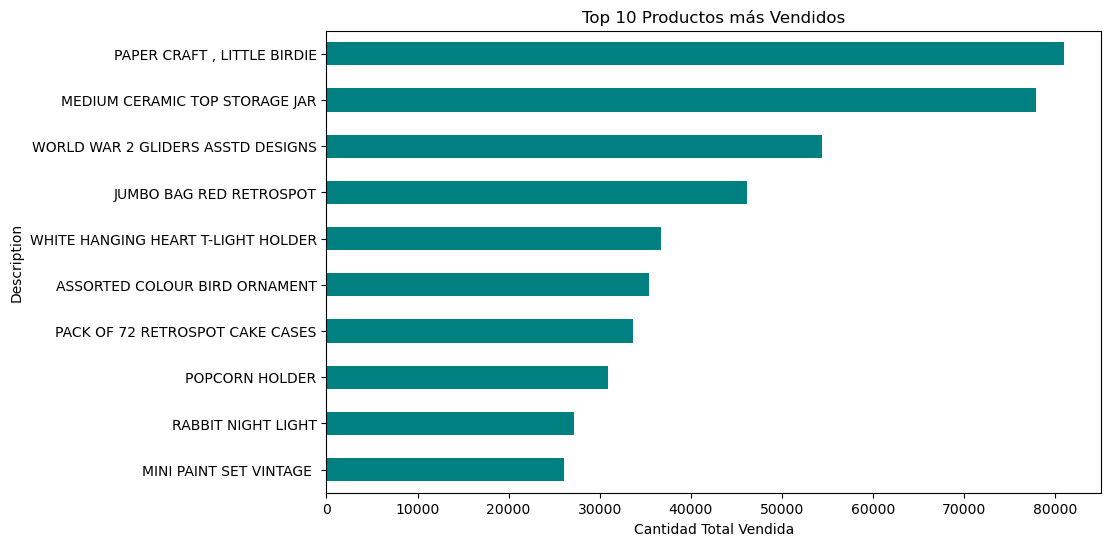

In [313]:
top_products = df_clean.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10, 6), color='teal')
plt.xlabel("Cantidad Total Vendida")
plt.title("Top 10 Productos más Vendidos")
plt.gca().invert_yaxis()
plt.show()

- Los productos más vendidos por cantidad son en su mayoría artículos decorativos o utilitarios pequeños.
- Se destacan:
  - `PAPER CRAFT , LITTLE BIRDIE`
  - `MEDIUM CERAMIC TOP STORAGE JAR`
- Este patrón indica una posible alta rotación en artículos económicos y de regalo.

### 🌍 **Distribución de Transacciones por País (Top 4)**

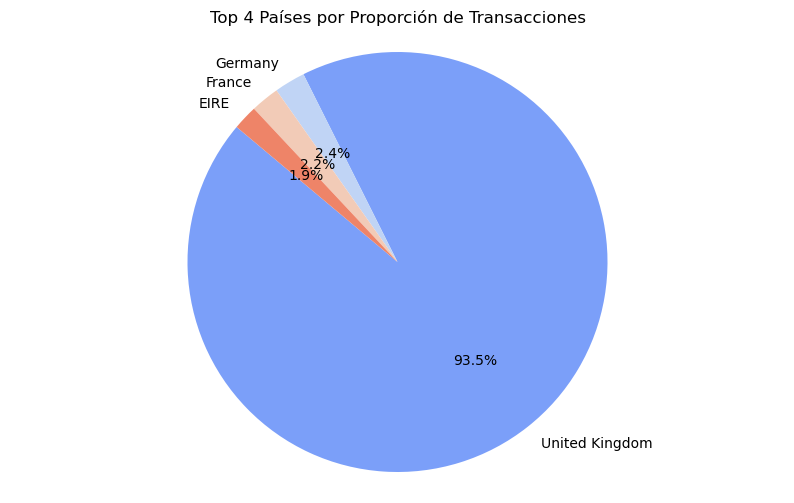

In [314]:
top4_countries = df_clean['Country'].value_counts().head(4)

plt.figure(figsize=(10, 6))
plt.pie(top4_countries.values, labels=top4_countries.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm', 4))
plt.title("Top 4 Países por Proporción de Transacciones")
plt.axis('equal') 
plt.show()

- **United Kingdom** concentra el **93.5%** de todas las transacciones.
- Le siguen de forma marginal: **Germany**, **France** e **Irlanda**.
- Esta fuerte concentración valida el enfoque analítico exclusivo en Europa.

### 👥 **Clientes con Mayor Cantidad de Productos Comprados**

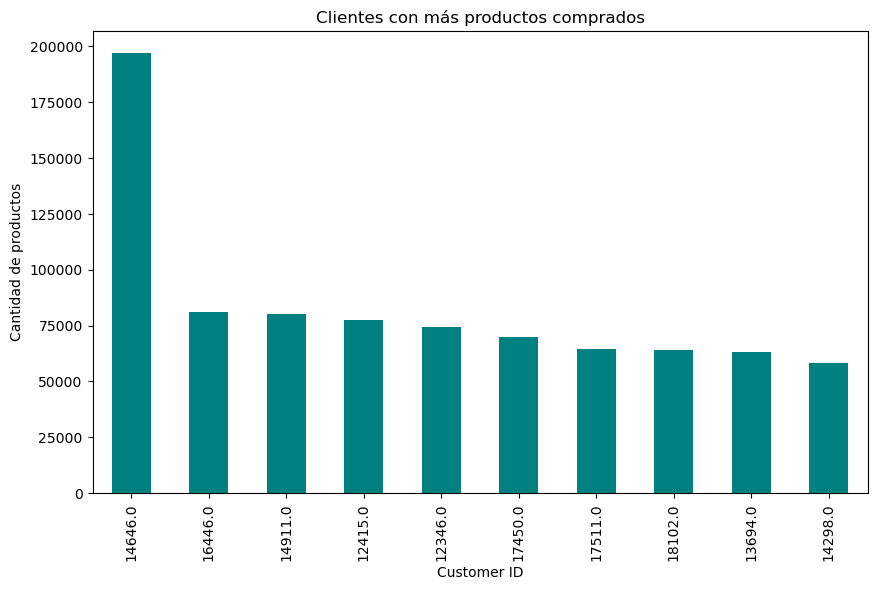

In [315]:
df_retail['CustomerID'] = df_clean['CustomerID'].astype('str')
prod_per_customer = df_clean.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)
prod_per_customer.plot(kind='bar', figsize=(10, 6), color='teal')
plt.title('Clientes con más productos comprados')
plt.xlabel('Customer ID')
plt.ylabel('Cantidad de productos')
plt.show()

- Un grupo reducido de clientes realiza un volumen de compras significativamente superior.
- El cliente con ID `14646.0` supera ampliamente al resto.
- Se observa una **distribución altamente desbalanceada**, con fuerte presencia de clientes top.

### 🔁 **Frecuencia Mensual por Segmento de Gasto**

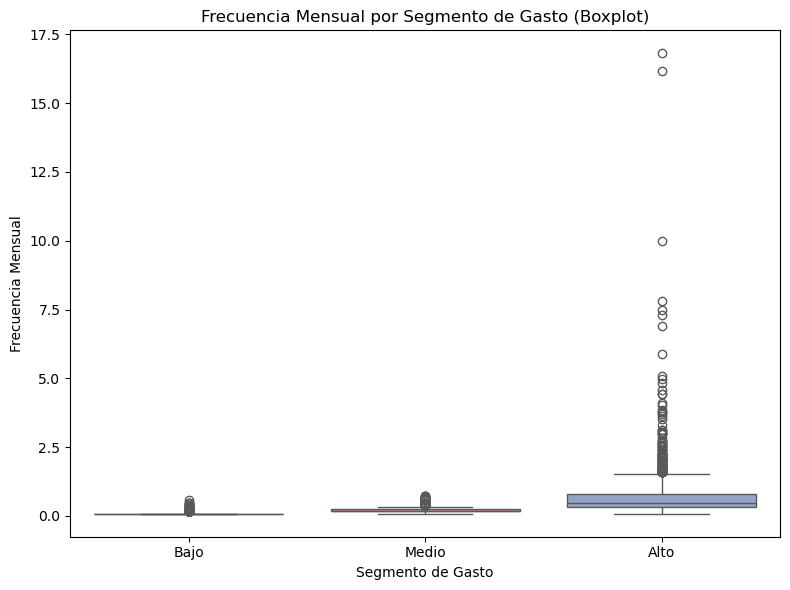

In [316]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clientes, x='segmento_gasto', y='frecuencia_mensual', palette='Set2')
plt.title("Frecuencia Mensual por Segmento de Gasto (Boxplot)")
plt.xlabel("Segmento de Gasto")
plt.ylabel("Frecuencia Mensual")
plt.tight_layout()
plt.show()


- Los clientes del **segmento de gasto Alto** presentan mayor dispersión en la frecuencia de compra.
- Los segmentos **Medio** y **Bajo** se agrupan con frecuencias mucho más reducidas.
- Esto sugiere que el gasto alto no siempre implica alta frecuencia, pero sí mayor variabilidad en comportamiento.

### 🧩 **Distribución de Tipo de Cliente en Europa**

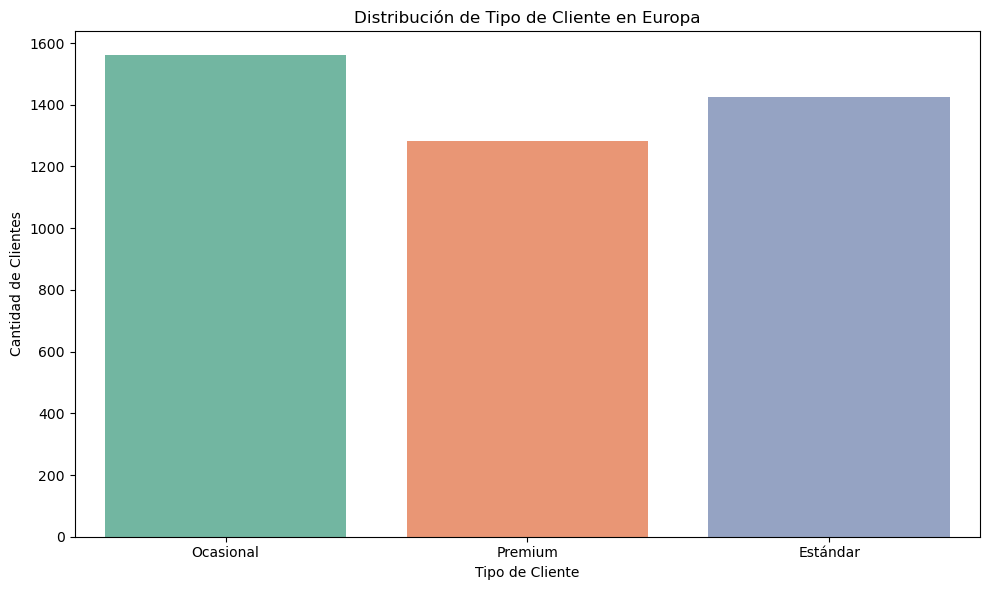

In [317]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clientes[df_clientes['continente'] == 'Europa'], x='tipo_cliente', palette='Set2')
plt.title("Distribución de Tipo de Cliente en Europa")
plt.xlabel("Tipo de Cliente")
plt.ylabel("Cantidad de Clientes")
plt.tight_layout()
plt.show()

- La mayoría de los clientes europeos se distribuyen entre:
  - **Ocasional**: ~40%
  - **Estándar**: ~35%
  - **Premium**: ~25%
- Esto indica que, si bien existe una base fiel de clientes recurrentes, el volumen está fuertemente impulsado por **clientes de compra ocasional**.


## ✅ Conclusión General
El análisis sugiere que la empresa se apoya principalmente en ventas de productos de bajo costo, distribuidos a través de un gran número de clientes esporádicos. Sin embargo, existe un subconjunto pequeño pero clave de **clientes de alto valor** que representan una proporción desproporcionada del volumen de ventas. Este grupo debería ser el foco de estrategias de retención y fidelización.


---

### →  Gráfico relativo de algunas características seleccionadas: Un subconjunto de datos

<Figure size 640x480 with 0 Axes>

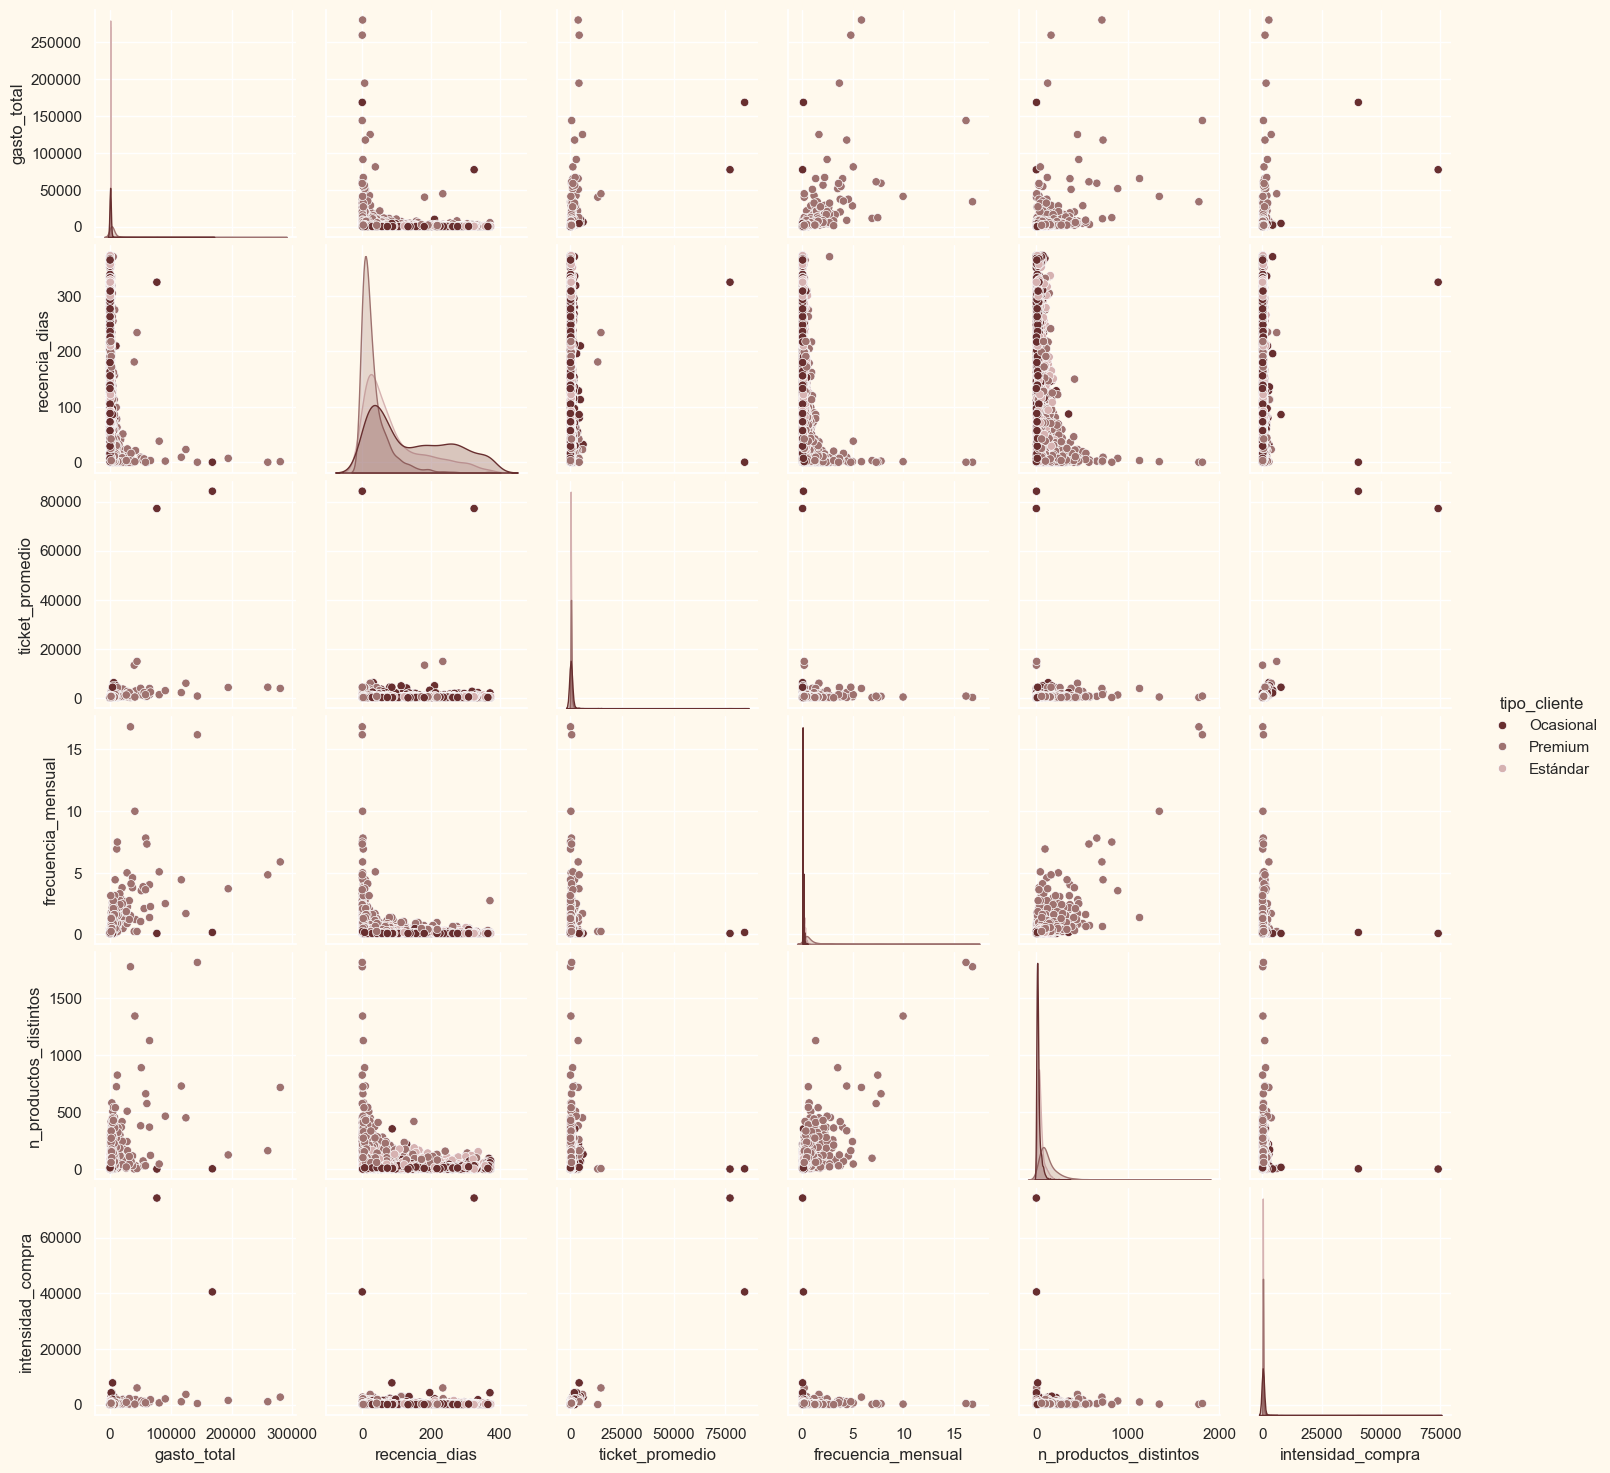

In [318]:
# Configuración de colores personalizada
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(pallet)

# Variables a graficar (revisá que existan en tu df_clientes)
To_Plot = ["gasto_total", "recencia_dias", "ticket_promedio", "frecuencia_mensual", "n_productos_distintos", "intensidad_compra"]

# Elegimos un hue que represente el perfil: tipo_cliente o segmento_gasto
plt.figure()
sns.pairplot(df_clientes[To_Plot + ["tipo_cliente"]], hue="tipo_cliente", palette=pallet)
plt.show()


## 📊 Conclusiones del Análisis Visual (Pairplot)

- **Distribuciones sesgadas**: La mayoría de las variables (como `gasto_total`, `ticket_promedio` e `intensidad_compra`) presentan una fuerte **asimetría positiva** (muchos clientes gastan poco y unos pocos gastan muchísimo). Esto sugiere la necesidad de escalar o transformar estas variables antes del clustering.

- **Agrupamientos difusos entre perfiles**:
  - No hay **fronteras claramente separadas** entre `tipo_cliente` (Premium, Estándar, Ocasional) en el espacio bidimensional. Los puntos están **superpuestos**, lo cual indica que los perfiles no son perfectamente distinguibles solo con estas variables.
  - Sin embargo, se observa cierta **tendencia de los clientes Premium** a concentrarse en niveles más altos de `gasto_total`, `ticket_promedio` y `frecuencia_mensual`.

- **Relación esperada entre variables**:
  - `ticket_promedio` y `gasto_total` tienen una **correlación positiva moderada** (a mayor gasto total, mayor ticket).
  - `recencia_dias` tiende a ser **más baja** en clientes con mayor frecuencia de compra, lo que tiene sentido: los clientes activos compraron más recientemente.

- **Outliers**:
  - Existen varios **clientes atípicos** con valores extremadamente altos en `gasto_total` o `ticket_promedio`. Es recomendable considerar **transformaciones logarítmicas** o tratarlos como **casos especiales** para no distorsionar la segmentación.

- **Variables útiles para clustering**:
  - Variables como `frecuencia_mensual`, `ticket_promedio`, `n_productos_distintos` e `intensidad_compra` muestran suficiente variabilidad como para ser **buenas candidatas** para segmentación no supervisada.

---

### →  Correlación entre variables

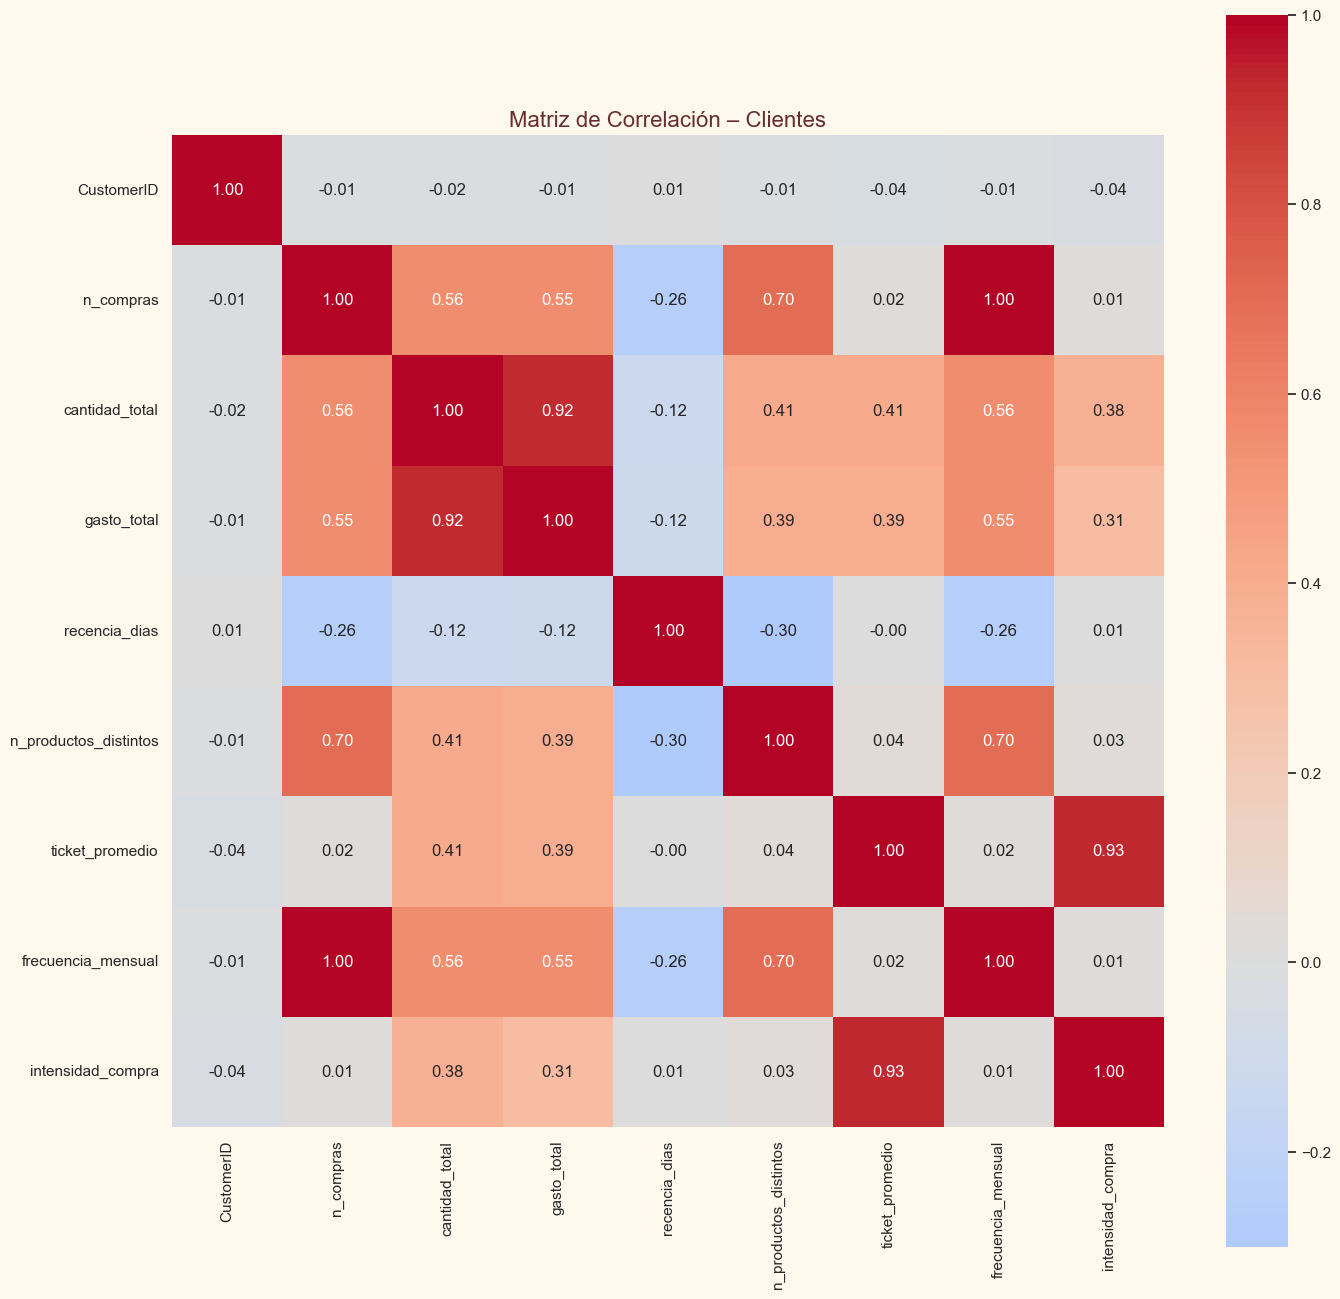

In [319]:
numeric_data = df_clientes.select_dtypes(include=[np.number])
corrmat = numeric_data.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corrmat, annot=True, cmap="coolwarm", center=0, fmt=".2f", square=True)
plt.title("Matriz de Correlación – Clientes", fontsize=16, color="#682F2F")
plt.show()


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">PREPROCESAMIENTO DE LOS DATOS</p>

En esta sección, realizaré el preprocesamiento del dataset para preparar los datos antes de aplicar técnicas de **clustering**.

**Los pasos aplicados en esta etapa son:**

- 🔁 **Transformación logarítmica** en variables numéricas sesgadas para reducir la influencia de outliers y mejorar la simetría de las distribuciones.
- 🏷️ **Codificación de etiquetas** en las características categóricas, usando `LabelEncoder` para convertirlas a valores numéricos.
- 📏 **Escalado de las características** mediante `StandardScaler` para estandarizar los valores y asegurar que todas las variables tengan igual importancia.
- 📊 **Creación de un DataFrame escalado** (`scaled_df`), que va a ser usado para la reducción de dimensionalidad y posterior segmentación no supervisada.


In [320]:
# 1. Copiar el DataFrame original
data = df_clientes.copy()

In [321]:
# 2. Variables numéricas sesgadas para la transformación logarítmica
log_cols = ['gasto_total', 'ticket_promedio', 'cantidad_total', 'intensidad_compra', 'n_productos_distintos']

# Aplico log1p para reducir sesgo y outliers
data[log_cols] = data[log_cols].apply(np.log1p)

In [322]:
# 3. Detección de TODAS las columnas no numéricas (object, category, etc.)
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()
print("Columnas no numéricas detectadas:", non_numeric_cols)

# Aplico LabelEncoder a todas las columnas no numéricas
LE = LabelEncoder()
for col in non_numeric_cols:
    data[col] = LE.fit_transform(data[col])

print("✅ Todas las características no numéricas fueron codificadas como numéricas.")

Columnas no numéricas detectadas: ['pais', 'producto_top', 'segmento_gasto', 'continente', 'segmento_recencia', 'tipo_cliente']
✅ Todas las características no numéricas fueron codificadas como numéricas.


In [323]:
# 4. Escalado con StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(data)

# Convertir array escalado en DataFrame
scaled_df = pd.DataFrame(scaled_array, columns=data.columns)

In [324]:
print("✅ Transformaciones logarítmicas aplicadas a variables sesgadas.")
print("✅ Todas las variables están codificadas y escaladas.")
print("📊 DataFrame final listo para clustering o PCA:")
scaled_df.head()

✅ Transformaciones logarítmicas aplicadas a variables sesgadas.
✅ Todas las variables están codificadas y escaladas.
📊 DataFrame final listo para clustering o PCA:


,CustomerID,n_compras,cantidad_total,gasto_total,pais,producto_top,recencia_dias,n_productos_distintos,ticket_promedio,frecuencia_mensual,intensidad_compra,segmento_gasto,continente,segmento_recencia,tipo_cliente
0,-1.716073,-0.425097,3.816653,3.706225,0.292508,0.250474,2.334574,-2.525776,7.523483,-0.425097,6.828298,-1.224745,-0.069253,-1.226527,0.040850
1,-1.715492,0.354417,1.329485,1.411843,-2.781458,-0.059928,-0.905340,0.961635,1.038408,0.354417,0.905794,-1.224745,-0.069253,1.215830,1.297636
2,-1.714911,-0.035340,1.293900,0.716489,-3.428609,-0.617444,-0.175360,-0.370134,0.616141,-0.035340,1.469974,-1.224745,-0.069253,-0.005349,1.297636
3,-1.714330,-0.425097,0.337734,0.698739,-2.457882,1.368521,-0.735345,0.661260,2.445437,-0.425097,1.553147,-1.224745,-0.069253,1.215830,0.040850
4,-1.713749,-0.425097,-0.509484,-0.618962,-1.487156,1.407698,2.174578,-0.586482,0.220538,-0.425097,0.268494,0.000000,-0.069253,-1.226527,0.040850


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">REDUCCIÓN DE DIMENSIONALIDAD</p>

En este problema, hay muchos factores (atributos o características) sobre los cuales se va a hacer la clasificación final. Cuantas más características haya, más difícil va a ser trabajar con ellas. Muchas de estas características están correlacionadas y, por lo tanto, son redundantes. Es por eso que voy a hacer una **reducción de dimensionalidad** sobre las características seleccionadas antes de pasar a la parte de clustering.

> *La reducción de dimensionalidad es el proceso de reducir el número de variables aleatorias bajo consideración, obteniendo un conjunto de variables principales.*

---

### 🧠 ¿Qué es PCA?

**El Análisis de Componentes Principales (PCA)** es una técnica para reducir la dimensionalidad de conjuntos de datos de este tipo, aumentando la interpretabilidad pero al mismo tiempo minimizando la pérdida de información.

### ✨ Pasos en esta sección:

- Reducción de dimensionalidad con PCA
- Visualización del dataframe reducido en 3D


### 🔽 Reducción de dimensionalidad con PCA

Para este proyecto, voy a reducir las dimensiones a **3 componentes principales**.


In [325]:
# Reducción a 3 dimensiones
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=["PCA1", "PCA2", "PCA3"])

# Estadísticas descriptivas
PCA_df.describe().T


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,count,mean,std,min,25%,50%,75%,max
PCA1,4338.0,-7.862160e-17,2.306796,-7.377613,-1.547950,-0.537383,1.773015,21.314259
PCA2,4338.0,0.000000e+00,1.389631,-17.579097,-0.814398,-0.049944,0.810250,8.560755
PCA3,4338.0,-2.620720e-17,1.233278,-2.710145,-0.789484,-0.024957,0.773356,10.701944


In [345]:
fig = px.scatter_3d(
    PCA_df,
    x="PCA1",
    y="PCA2",
    z="PCA3",
    color_discrete_sequence=["maroon"],
    opacity=0.7
)

fig.update_layout(
    title="Proyección 3D de los datos tras PCA",
    scene=dict(
        xaxis_title="PCA1",
        yaxis_title="PCA2",
        zaxis_title="PCA3"
    ),
    width=800,
    height=600,
    #template="plotly_dark"
)

fig.show()


In [347]:
'''
# Gráfico 3D de la proyección PCA
x = PCA_df["PCA1"]
y = PCA_df["PCA2"]
z = PCA_df["PCA3"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="maroon", marker="o", alpha=0.6)
ax.set_title("Proyección 3D de los datos tras PCA")
plt.show()
'''

'\n# Gráfico 3D de la proyección PCA\nx = PCA_df["PCA1"]\ny = PCA_df["PCA2"]\nz = PCA_df["PCA3"]\n\nfig = plt.figure(figsize=(10, 8))\nax = fig.add_subplot(111, projection="3d")\nax.scatter(x, y, z, c="maroon", marker="o", alpha=0.6)\nax.set_title("Proyección 3D de los datos tras PCA")\nplt.show()\n'

## 📊 Conclusiones de la Proyección 3D tras PCA

La técnica de PCA logró condensar la información de múltiples variables en 3 componentes principales, facilitando la visualización y permitiendo una representación compacta del comportamiento de los clientes.

- 📌 **Concentración fuerte en el centro**: La mayoría de los puntos se concentran en una zona central del gráfico, lo cual indica que muchos clientes comparten características similares en las variables que fueron consideradas. Esto sugiere la existencia de un segmento dominante.

- 🌪️ **Presencia de dispersión**: A pesar de la concentración central, hay una dispersión leve en distintas direcciones, lo cual podría estar indicando la presencia de otros grupos de clientes con comportamientos atípicos o diferenciados.



<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

Con las dimensiones reducidas mediante PCA, voy a aplicar técnicas de **clustering no supervisado** para segmentar a los clientes.  
Los tres algoritmos a implementar para comparar resultados son:

1. **KMeans**
2. **Agglomerative Clustering**
3. **DBSCAN**

---


## **K-Means**

El algoritmo **KMeans** divide los datos en un número definido de grupos, minimizando la distancia interna de cada punto con respecto al centroide de su grupo.  
Primero voy a determinar el número óptimo de clusters utilizando el **método del codo (elbow method)**.

📐 Método del Codo (KMeans):


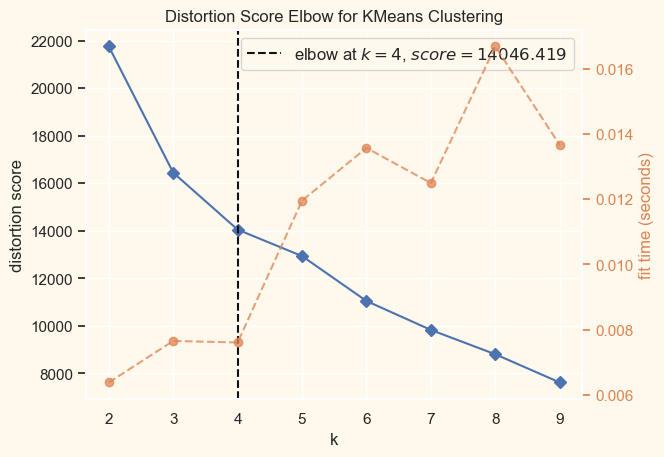

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [328]:
# Método del Codo
print("📐 Método del Codo (KMeans):")
elbow_model = KElbowVisualizer(KMeans(random_state=42), k=(2,10))
elbow_model.fit(PCA_df)
elbow_model.show()

In [329]:
# Clustering con KMeans usando el número óptimo de clusters
optimal_k = elbow_model.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
yhat_kmeans = kmeans.fit_predict(PCA_df)

# Agregar clusters al DataFrame
PCA_df["cluster_kmeans"] = yhat_kmeans

---

## **Agglomerative**

El algoritmo **Agglomerative Clustering** forma grupos jerárquicos mediante la fusión progresiva de observaciones similares.  
Voy a usar el mismo número de clusters sugerido por el método del codo.


In [330]:
agg_model = AgglomerativeClustering(n_clusters=optimal_k)
yhat_agg = agg_model.fit_predict(PCA_df)

# Asignar al DataFrame
PCA_df["cluster_agg"] = yhat_agg

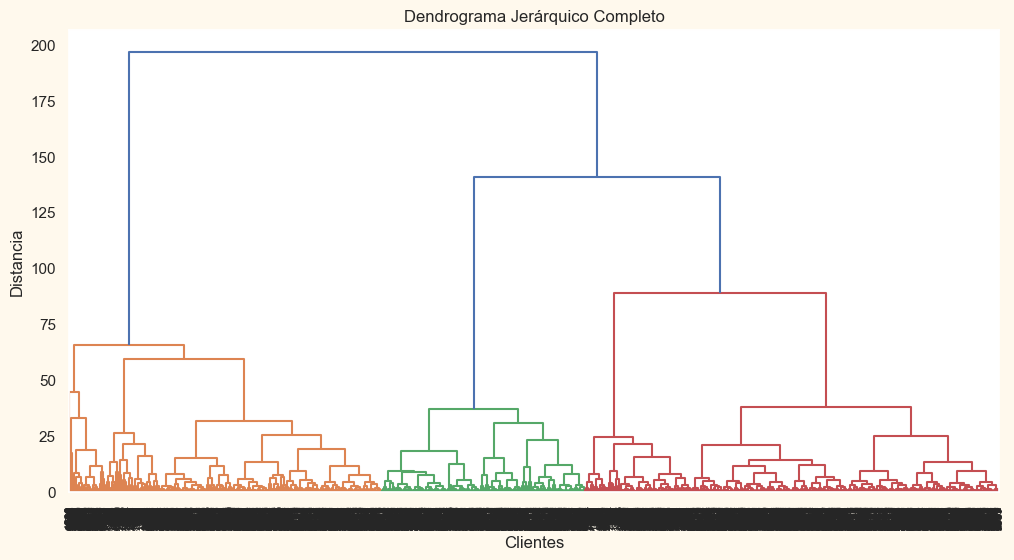

In [331]:
# En este caso uso PCA_df, pero puedo usar scaled_df (según lo que quiera mostrar jerárquicamente)
mergings = linkage(PCA_df, method='ward')  # otras opciones a usar son: 'complete', 'average', 'centroid'

# Dendrograma completo (más pesado si tenés muchos clientes)
plt.figure(figsize=(12, 6))
dendrogram(mergings, leaf_rotation=90, leaf_font_size=8)
plt.title("Dendrograma Jerárquico Completo")
plt.xlabel("Clientes")
plt.ylabel("Distancia")
plt.show()


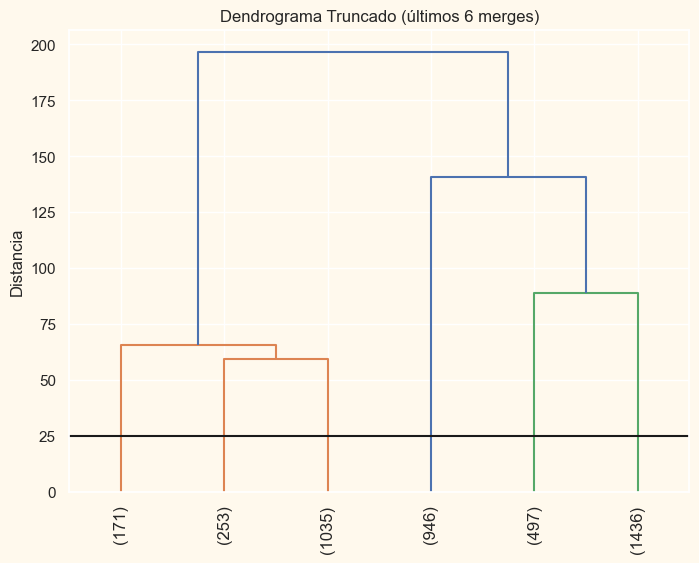

In [332]:
plt.figure(figsize=(8, 6))
dendrogram(mergings,
           truncate_mode='lastp',
           p=6,
           leaf_rotation=90,
           leaf_font_size=12,
)
plt.axhline(y=25, c='k')  # línea horizontal para sugerir corte en clusters
plt.title("Dendrograma Truncado (últimos 6 merges)")
plt.ylabel("Distancia")
plt.show()


## 🌿 Dendrograma Jerárquico (Truncado)

El dendrograma es una herramienta visual que permite observar la estructura jerárquica del agrupamiento aglomerativo.  
En este caso, se utiliza el **modo truncado** para mostrar únicamente los **últimos 6 agrupamientos significativos**, lo que facilita la interpretación.


### 📌 Observaciones clave:

- Cada número en la base representa el **tamaño del grupo fusionado** (por ejemplo, `(253)` indica que ese nodo agrupa 253 clientes).
- La **altura de las uniones verticales** representa la **distancia (o disimilitud)** entre los clústeres fusionados.
- Una línea horizontal (por ejemplo, a **y = 25**) puede utilizarse como **criterio visual de corte**, indicando que si se corta allí, se obtendrían aproximadamente **5 clústeres distintos**.
- Se puede ver que hay dos grandes ramas principales, lo cual sugiere que existen **dos segmentos muy diferentes entre sí**, y dentro de ellos, subgrupos bien definidos.


### ✅ Conclusión:

Este dendrograma justifica adecuadamente la elección de **4 o 5 clústeres** como valor razonable para `n_clusters` en el modelo `AgglomerativeClustering`.  
Además, refuerza la idea de que los datos tienen una **estructura jerárquica bien definida**, lo que hace que este tipo de clustering sea apropiado para el caso.


---

## **DBSCAN**


**DBSCAN** es un algoritmo de clustering basado en densidad. Es especialmente útil cuando los grupos no tienen una forma esférica o contienen ruido.  
Los puntos con poca densidad se marcan como outliers (`-1`).


In [ ]:
# Ajustar modelo DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
yhat_dbscan = dbscan.fit_predict(PCA_df)

# Asignar resultados
PCA_df["cluster_dbscan"] = yhat_dbscan

---

## **Comparativa Visual**

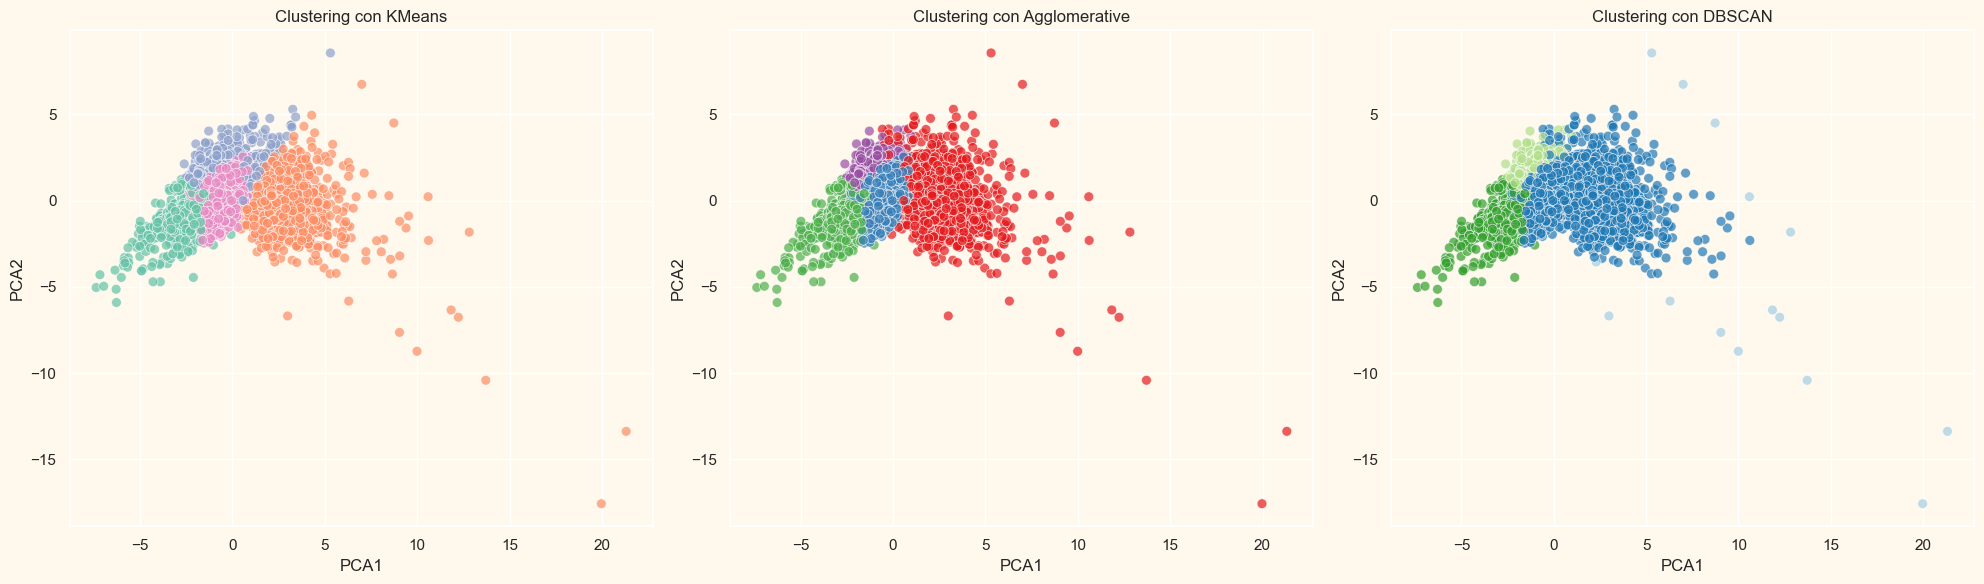

In [351]:
cluster_methods = ["cluster_kmeans", "cluster_agg", "cluster_dbscan"]
titles = ["KMeans", "Agglomerative", "DBSCAN"]
palettes = ["Set2", "Set1", "Paired"]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, method in enumerate(cluster_methods):
    sns.scatterplot(
        x=PCA_df["PCA1"],
        y=PCA_df["PCA2"],
        hue=PCA_df[method],
        palette=palettes[i],
        s=50,
        alpha=0.7,
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f"Clustering con {titles[i]}")
    axes[i].set_xlabel("PCA1")
    axes[i].set_ylabel("PCA2")

plt.tight_layout()
plt.show()


- Los tres algoritmos detectan la misma **estructura general de clusters**.
- **KMeans** y **Agglomerative Clustering** muestran resultados muy similares, indicando que los grupos en los datos son **densos, bien definidos y esféricos**, ideales para estos métodos.
- **DBSCAN** también identifica una estructura comparable, pero:
  - Tiene un clúster principal muy dominante.
  - Detecta puntos que **no clasifica** (outliers), representados en los extremos del gráfico.
  - Es útil para detección de comportamientos atípicos, no tanto para segmentación masiva.

➡️ **Entonces**: 
- Voy a usar **KMeans** si mi objetivo es segmentar clientes en grupos homogéneos para acciones de marketing.
- Voy a complementar con **DBSCAN** si me interesa detectar clientes fuera del patrón general (por ejemplo: clientes VIP extremos o comportamientos de riesgo).


---

<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">EVALUACIÓN DE MODELOS</p>

Dado que este es un problema de **clustering no supervisado**, no contamos con etiquetas verdaderas para evaluar el rendimiento de forma clásica.  
Por lo tanto, voy a evaluar la **calidad y utilidad de los clusters formados** mediante análisis exploratorio y visual.


## 🎯 Objetivo de esta sección:

- Ver cómo se distribuyen los clientes en los clusters formados
- Analizar las variables clave como gasto, recencia, ticket promedio y frecuencia
- Identificar si hay patrones útiles o perfiles destacables en los grupos


In [335]:
# Unir los clusters desde PCA_df a df_clientes por índice
df_clientes = df_clientes.copy()
df_clientes[["cluster_kmeans", "cluster_agg", "cluster_dbscan"]] = PCA_df[["cluster_kmeans", "cluster_agg", "cluster_dbscan"]].values

In [336]:
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]

---

## 1) Contador de distribución por método

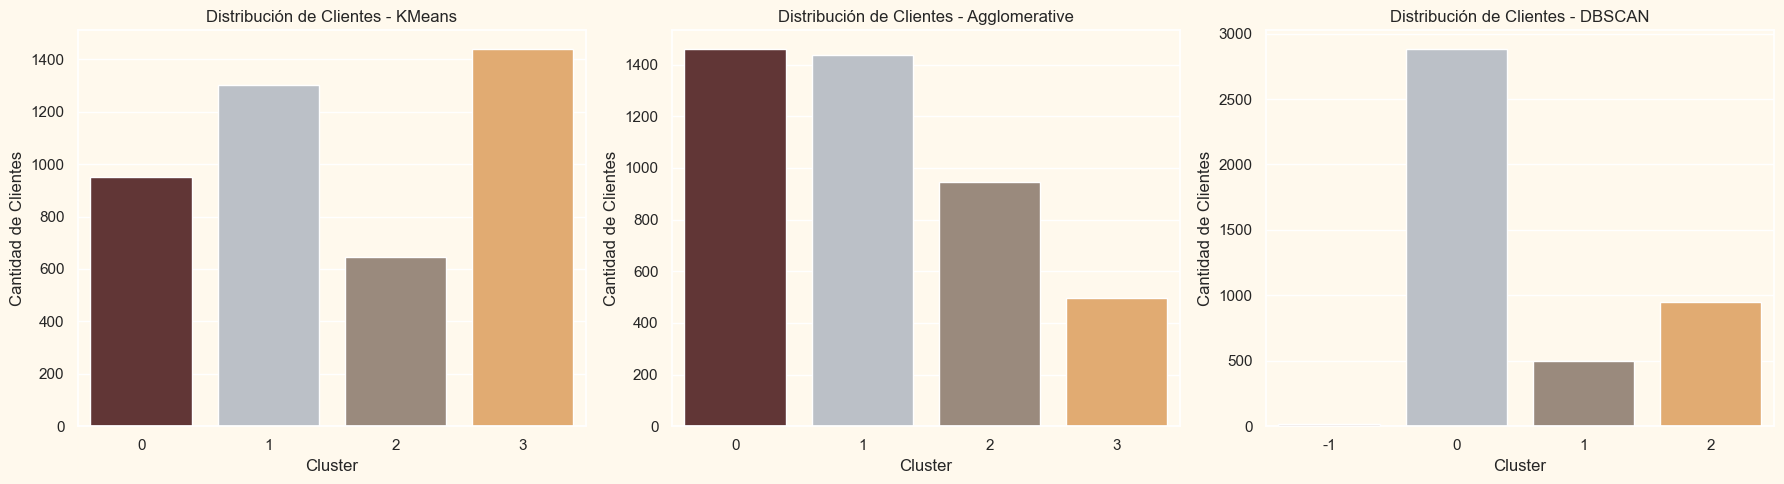

In [337]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, method in enumerate(cluster_methods):
    sns.countplot(x=df_clientes[method], palette=pal, ax=axes[i])
    axes[i].set_title(f"Distribución de Clientes - {titles[i]}")
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel("Cantidad de Clientes")

plt.tight_layout()
plt.show()


## 🧠 Conclusiones 

- 🔹 **KMeans**: Forma 4 clústeres con una distribución relativamente equilibrada. El clúster 3 contiene la mayor cantidad de clientes, seguido por el 1. Esto sugiere una segmentación estable y balanceada, ideal para estrategias diferenciadas.

- 🔸 **Agglomerative Clustering**: También genera una distribución razonable, aunque puede presentar una leve descompensación dependiendo de los parámetros de distancia. Es útil para estructuras jerárquicas, pero más sensible al ruido.

- ⚠️ **DBSCAN**: Detecta varios puntos como **outliers** (`-1`), lo que indica que este algoritmo considera que ciertos clientes no pertenecen a ningún grupo claramente definido. Aunque útil para detectar anomalías, sufre en datasets de densidad variable y puede agrupar pocos puntos en clusters válidos.

> ✅ **Conclusión general**: KMeans ofrece una distribución clara y útil para segmentación masiva, mientras que Agglomerative aporta jerarquía y DBSCAN se destaca en detectar comportamientos atípicos o extremos.


---

## 2) Análisis de variables clave por cluster

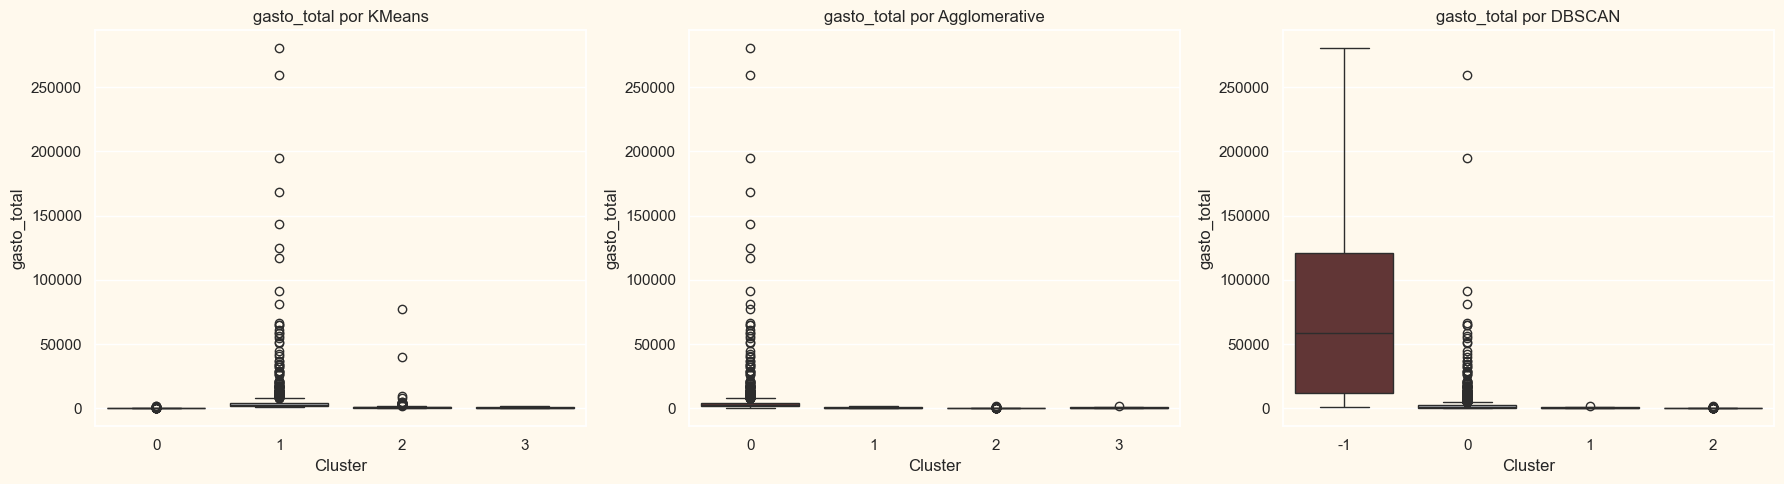

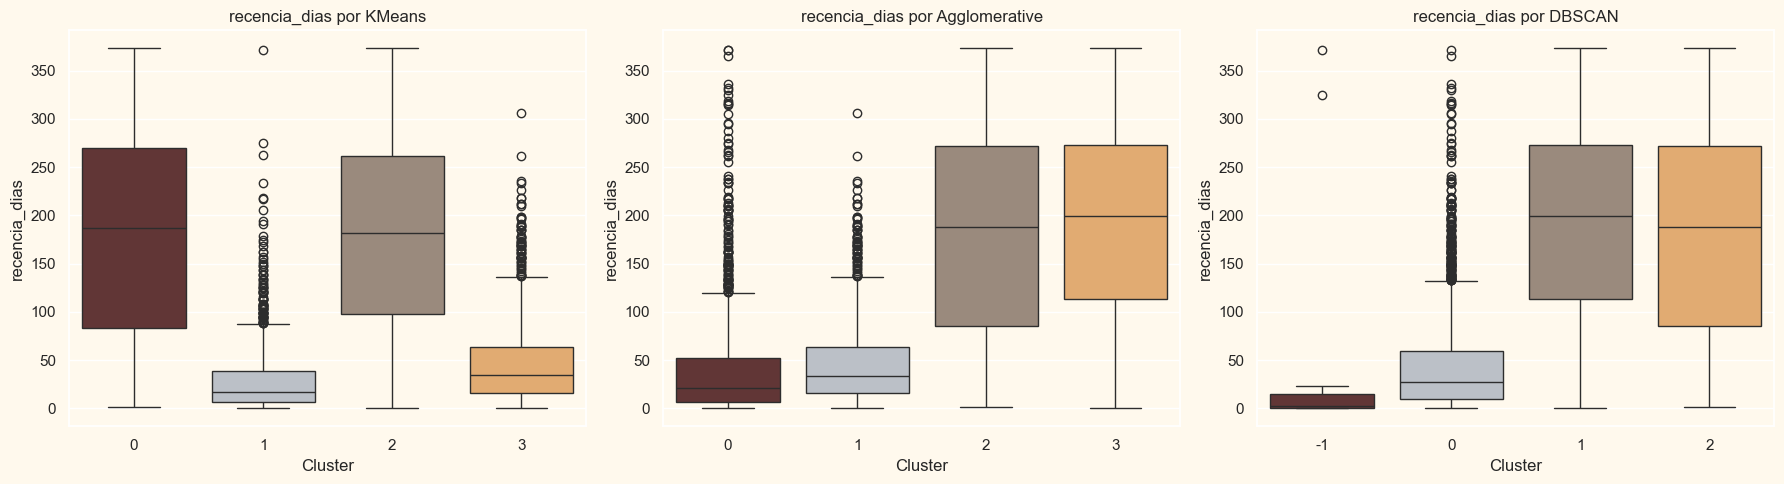

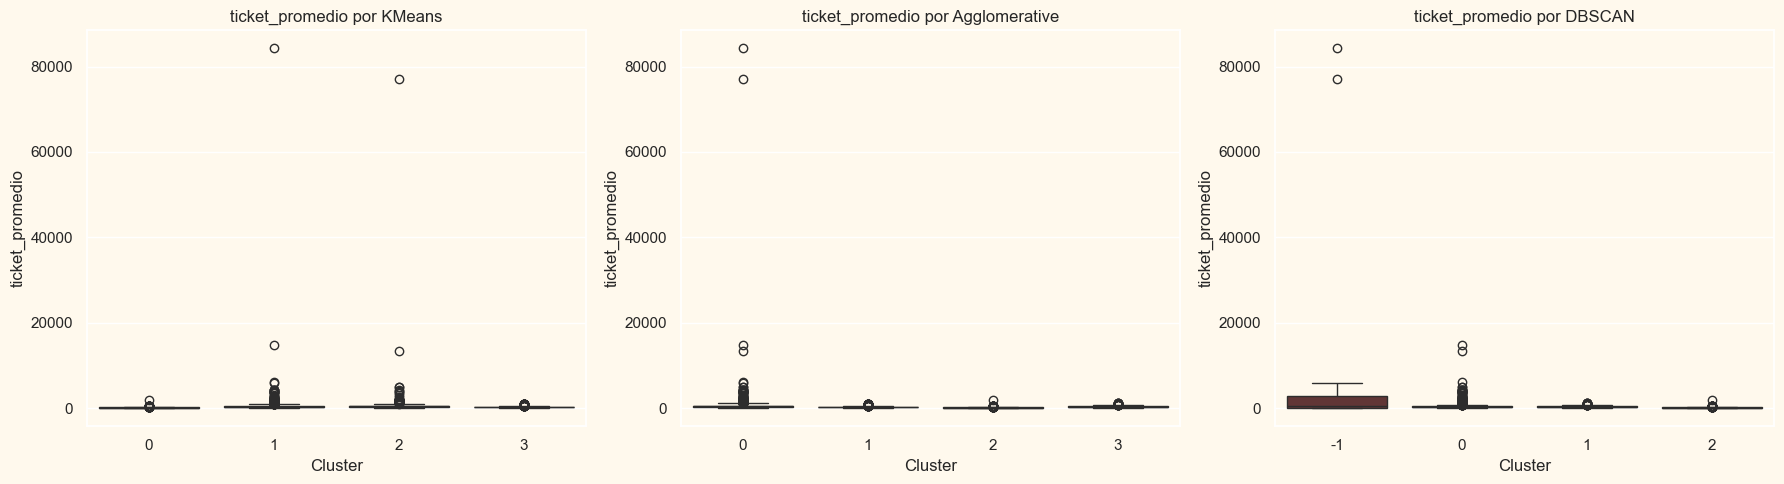

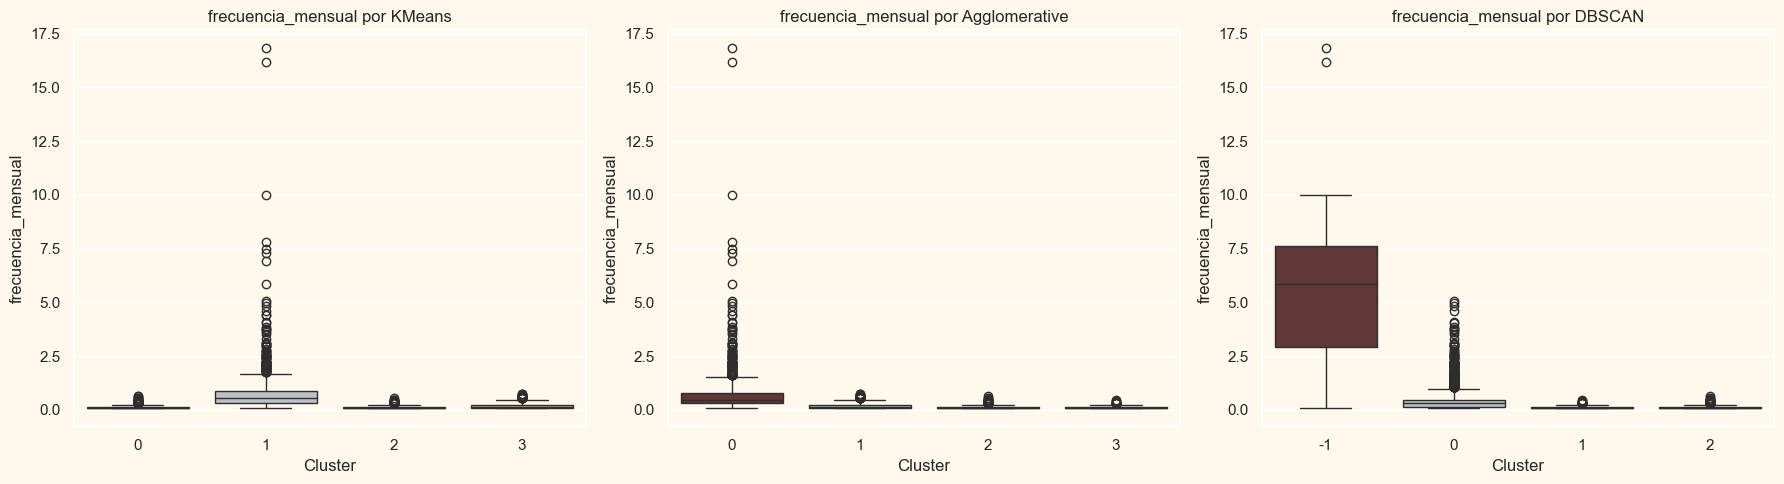

In [ ]:
variables = ["gasto_total", "recencia_dias", "ticket_promedio", "frecuencia_mensual"]

for var in variables:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for i, method in enumerate(cluster_methods):
        sns.boxplot(data=df_clientes, x=method, y=var, palette=pal, ax=axes[i])
        axes[i].set_title(f"{var} por {titles[i]}")
        axes[i].set_xlabel("Cluster")
        axes[i].set_ylabel(var)
    plt.tight_layout()
    plt.show()


## 💰 Comparación de Clústeres según Gasto Total

#### 🔹 KMeans

- El **clúster 1** contiene a los clientes con mayor gasto total, incluyendo a los **grandes compradores** (outliers).
- El resto de los clústeres (0, 2 y 3) tienen una concentración de clientes de bajo gasto.
- KMeans logró separar claramente un segmento de **alto valor económico**, ideal para estrategias de fidelización o premium.

#### 🔸 Agglomerative Clustering

- Agrupó la mayoría de los grandes gastadores en el **clúster 0**, dejando los demás con comportamientos similares pero de menor volumen.
- Similar a KMeans, aunque menos balanceado en la distribución de clientes entre grupos.
- Menor claridad visual en la diferenciación de clústeres si se compara con KMeans.

#### ⚠️ DBSCAN

- Detecta el grupo `-1` como **outliers**: este grupo incluye prácticamente **todos los grandes gastadores**.
- Los clústeres válidos (0, 1 y 2) tienen un gasto bajo, homogéneo y estrecho.
- Muy útil para detectar comportamientos **atípicos o extremos**, pero **no genera una segmentación equilibrada**.


#### ✅ Conclusión

- **KMeans** es el más efectivo para separar a los clientes de **alto gasto** del resto, generando clústeres más útiles para acciones de marketing personalizadas.
- **Agglomerative** ofrece resultados similares pero menos balanceados.
- **DBSCAN** destaca como detector de outliers, pero no es recomendable como única estrategia de segmentación si se busca una distribución útil para campañas.


---

## 3) Scatterplot de pares clave (PCA opcional o variables originales)


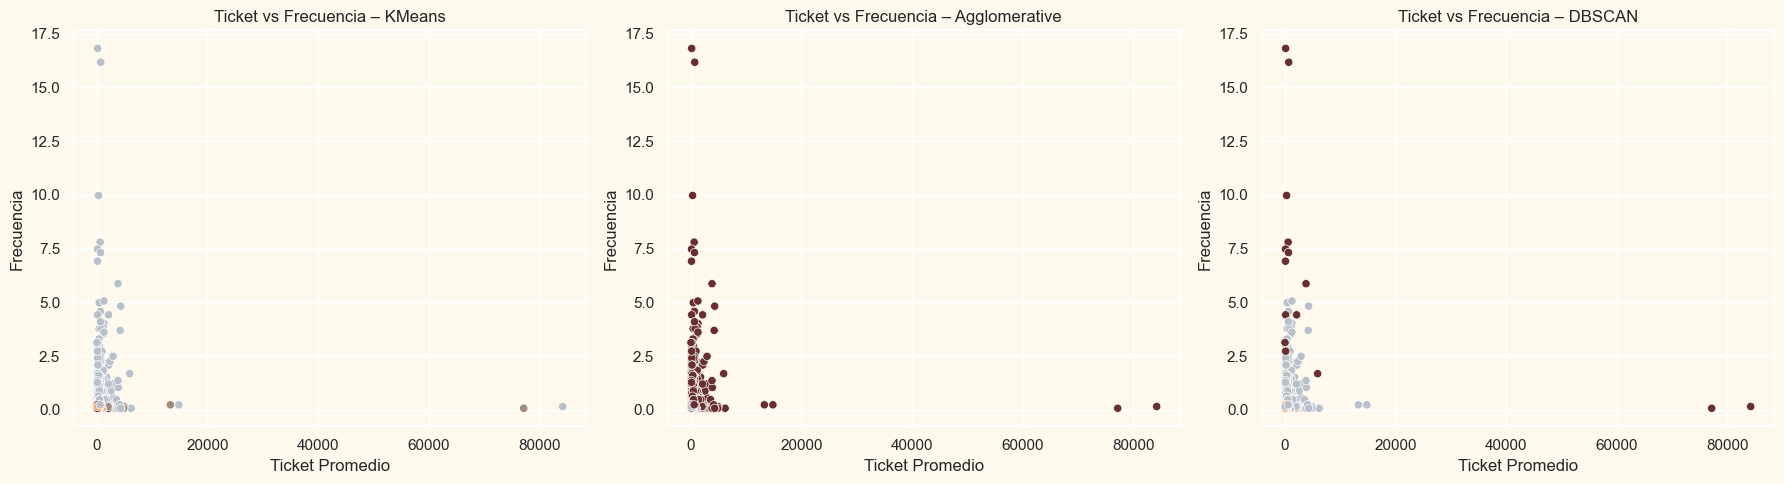

In [339]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, method in enumerate(cluster_methods):
    sns.scatterplot(
        data=df_clientes,
        x="ticket_promedio",
        y="frecuencia_mensual",
        hue=method,
        palette=pal,
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f"Ticket vs Frecuencia – {titles[i]}")
    axes[i].set_xlabel("Ticket Promedio")
    axes[i].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


#### 🔹 KMeans
- Se observa una buena diferenciación entre clientes con **tickets altos pero baja frecuencia**, y clientes más frecuentes con tickets bajos.
- Algunos clústeres capturan comportamientos extremos (alto ticket y baja frecuencia), lo que indica una **segmentación informativa**.
- Los grupos están razonablemente bien distribuidos, permitiendo identificar distintos **perfiles de compra**.

#### 🔸 Agglomerative Clustering
- La mayoría de los puntos fueron asignados al mismo clúster, mostrando **menor diferenciación** entre perfiles.
- Poca separación visual entre grupos, lo cual puede dificultar la identificación de estrategias específicas por perfil.
- Aún así, logra identificar algunos compradores de alto ticket, aunque con menor claridad que KMeans.

#### ⚠️ DBSCAN
- DBSCAN etiqueta muchos puntos como parte de un solo grupo (posiblemente `-1` u outliers).
- No logra formar **grupos internos consistentes** entre ticket y frecuencia.
- Es útil para detectar anomalías, pero **no separa bien los perfiles frecuentes vs ticket alto**, por lo que **no se recomienda para segmentación masiva** en este caso.


#### ✅ Conclusión General
- **KMeans** es el más adecuado para segmentar según patrones de ticket promedio y frecuencia de compra.
- **Agglomerative** es más conservador y tiende a agrupar puntos similares juntos, pero pierde capacidad de separar comportamientos extremos.
- **DBSCAN** no segmenta con efectividad y resulta útil solo para detectar casos atípicos.

➡️ Recomendación: Usar **KMeans como método base** para construir perfiles accionables y luego complementar con **DBSCAN para detectar outliers valiosos o riesgosos**.


---

## 4) Crosstabs


### 1️⃣ ¿El modelo separa bien Premium vs Ocasionales? (`tipo_cliente` vs `cluster_*`)

In [340]:
print("📊 KMeans vs tipo_cliente")
print(pd.crosstab(df_clientes['tipo_cliente'], df_clientes['cluster_kmeans']), "\n")

print("📊 Agglomerative vs tipo_cliente")
print(pd.crosstab(df_clientes['tipo_cliente'], df_clientes['cluster_agg']), "\n")

print("📊 DBSCAN vs tipo_cliente")
print(pd.crosstab(df_clientes['tipo_cliente'], df_clientes['cluster_dbscan']), "\n")


📊 KMeans vs tipo_cliente
cluster_kmeans    0     1    2     3
tipo_cliente                        
Estándar         75     0  348  1023
Ocasional       872    47  255   413
Premium           4  1255   44     2 

📊 Agglomerative vs tipo_cliente
cluster_agg      0     1    2    3
tipo_cliente                      
Estándar        17  1023   75  331
Ocasional      137   413  871  166
Premium       1305     0    0    0 

📊 DBSCAN vs tipo_cliente
cluster_dbscan  -1     0    1    2
tipo_cliente                      
Estándar         0  1040  331   75
Ocasional        2   548  166  871
Premium         13  1292    0    0 



#### 🔹 KMeans
- **Premium** está extremadamente concentrado en el clúster 1 (1255 de 1305 clientes), lo cual es excelente.
- **Ocasionales** se distribuyen principalmente entre clústeres 0 y 3.
- **Estándar** se concentra en el clúster 3 (1023), aunque con algo de dispersión.
✅ **KMeans logra una segmentación muy clara entre Premium y los demás perfiles.**

#### 🔸 Agglomerative
- Todos los **Premium** (1305) fueron puestos en el clúster 0. Muy efectivo para esa categoría.
- Pero **Estándar** y **Ocasionales** están mezclados entre clústeres 1, 2 y 3.
⚠️ Aísla bien Premium, pero **no distingue tan bien entre Estándar y Ocasional**.

#### ⚠️ DBSCAN
- Detecta casi todos los **Premium** en el clúster 0 (1292), dejando pocos como outliers.
- Mezcla Estándar y Ocasional, con mayor dispersión.
✅ **Buen detector de Premium y outliers**, pero **no útil para diferenciar los demás perfiles**.

### 2️⃣ ¿Identifica a los clientes más rentables? (`segmento_gasto` vs `cluster_*`)

In [341]:
print("📊 KMeans vs segmento_gasto")
print(pd.crosstab(df_clientes['segmento_gasto'], df_clientes['cluster_kmeans']), "\n")

print("📊 Agglomerative vs segmento_gasto")
print(pd.crosstab(df_clientes['segmento_gasto'], df_clientes['cluster_agg']), "\n")

print("📊 DBSCAN vs segmento_gasto")
print(pd.crosstab(df_clientes['segmento_gasto'], df_clientes['cluster_dbscan']), "\n")


📊 KMeans vs segmento_gasto
cluster_kmeans    0     1    2     3
segmento_gasto                      
Bajo            870     0  168   408
Medio            75     0  348  1023
Alto              6  1302  131     7 

📊 Agglomerative vs segmento_gasto
cluster_agg        0     1    2    3
segmento_gasto                      
Bajo               5   408  869  164
Medio             17  1023   75  331
Alto            1437     5    2    2 

📊 DBSCAN vs segmento_gasto
cluster_dbscan  -1     0    1    2
segmento_gasto                    
Bajo             0   413  164  869
Medio            0  1040  331   75
Alto            15  1427    2    2 



#### 🔹 KMeans
- **Clientes de gasto Alto** (1302 de 1346) están en clúster 1. Muy buena separación.
- **Bajo** está claramente en clúster 0.
✅ Segmentación muy alineada con el gasto total del cliente.

#### 🔸 Agglomerative
- Agrupa el **99% de los clientes de gasto Alto** en clúster 0.
- Resto está repartido sin mucha claridad.
⚠️ Si bien separa bien a los de alto gasto, **mezcla Medio y Bajo**.

#### ⚠️ DBSCAN
- Detecta los **Alto** mayoritariamente en clúster 0 (1427), y algunos como outliers (`-1`).
- Mezcla bastante Medio y Bajo entre clústeres 1 y 2.
✅ Sirve para detectar extremos, pero **no es balanceado** para segmentar en 3 niveles de gasto.

### 3️⃣ ¿Aísla bien a los inactivos o recientes? (`segmento_recencia` vs `cluster_*`)

In [342]:
print("📊 KMeans vs segmento_recencia")
print(pd.crosstab(df_clientes['segmento_recencia'], df_clientes['cluster_kmeans']), "\n")

print("📊 Agglomerative vs segmento_recencia")
print(pd.crosstab(df_clientes['segmento_recencia'], df_clientes['cluster_agg']), "\n")

print("📊 DBSCAN vs segmento_recencia")
print(pd.crosstab(df_clientes['segmento_recencia'], df_clientes['cluster_dbscan']), "\n")


📊 KMeans vs segmento_recencia
cluster_kmeans       0    1    2    3
segmento_recencia                    
Reciente            60  801   28  575
Intermedio         190  424  108  707
Inactivo           701   77  511  156 

📊 Agglomerative vs segmento_recencia
cluster_agg          0    1    2    3
segmento_recencia                    
Reciente           806  575   59   24
Intermedio         476  705  186   62
Inactivo           177  156  701  411 

📊 DBSCAN vs segmento_recencia
cluster_dbscan     -1     0    1    2
segmento_recencia                    
Reciente           13  1368   24   59
Intermedio          0  1181   62  186
Inactivo            2   331  411  701 



#### 🔹 KMeans
- **Recientes** están bastante bien capturados en clúster 1.
- **Inactivos** aparecen mayormente en clúster 0.
- Clúster 3 parece mixto.
✅ Distingue aceptablemente entre niveles de recencia, aunque con algo de mezcla.

#### 🔸 Agglomerative
- **Recientes** están en clúster 1.
- **Inactivos** principalmente en clúster 2 y 3.
- **Intermedios** se mezclan en clústeres 0 y 1.
⚠️ Ofrece estructura, pero **no tan precisa en la separación de recencia**.

#### ⚠️ DBSCAN
- Muy buena separación:
  - **Recientes** en clúster 0 (1368).
  - **Inactivos** en clúster 2 (701).
  - Muy pocos outliers.
✅ Sorprendentemente, **DBSCAN segmenta bien por recencia**.

<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">CONCLUSIONES</p>

- **KMeans**:
  - ⭐ Excelente para separar `Premium`, `Alto gasto`, y distinguir niveles de recencia.
  - ✅ Recomendado para segmentación general y campañas masivas.

- **Agglomerative**:
  - 👍 Aísla bien `Premium`, pero mezcla los demás.
  - 🧱 Útil para análisis jerárquico, pero menos claro en segmentación operativa.

- **DBSCAN**:
  - 🔍 Fuerte para detectar outliers y `recencia`, pero **pobre para segmentar tipo_cliente o gasto medio/bajo**.
  - ✅ Ideal como método complementario para detectar perfiles extremos.

➡️ **Entonces**: Usar `KMeans` como modelo base y complementar con `DBSCAN` para detección de outliers o segmentos atípicos.